# Chapter 4. Feature engineering and Represeting data.
# Part 2. Binning.

Binning is the float feature categorization by discretization.

In some cases it increases model generalization ability. But it makes it worse for decision trees because they can implement some kind of binning by themselves.

#### Models (Linear regression and Decision tree regressor) without binning:

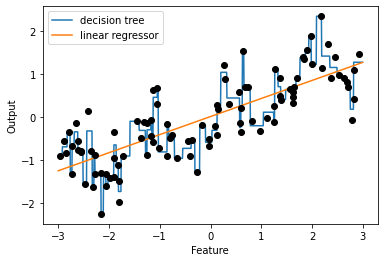

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

#loading dataset
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)

reg1 = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg1.predict(line), label='decision tree')

reg2 = LinearRegression().fit(X, y)
plt.plot(line, reg2.predict(line), label='linear regressor')

plt.plot(X[:,0], y, 'o', c='k')

plt.ylabel('Output')
plt.xlabel('Feature')
plt.legend(loc='best')

#### Models with binning:

Implementing binning:

In [9]:
#creating bin diapasons for feature
bins = np.linspace(-3,3,11)
print('bin diapasons: {}'.format(bins))

#assigning corresponding bins to samples features
which_bin = np.digitize(X, bins=bins)
print('\nSamples features:\n', X[:5])
print('\nSamples bins:\n', which_bin[:5])

bin diapasons: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Samples features:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Samples bins:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


One-hot-encoding for gain bins (via sklearn tools):

In [12]:
from sklearn.preprocessing import OneHotEncoder
#encoder initialization and building (building is finding unique values)
encoder = OneHotEncoder(sparse=False).fit(which_bin)
#'transform' implements one-hot-encoding
X_binned = encoder.transform(which_bin)

print(X_binned.shape)
print(X_binned[:5])

(100, 10)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Applying models to binned data:

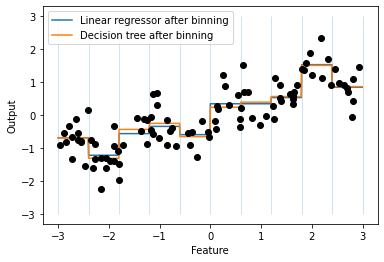

In [24]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg1 = LinearRegression().fit(X_binned, y)
plt.plot(line, reg1.predict(line_binned), label='Linear regressor after binning')

reg2 = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg2.predict(line_binned), label='Decision tree after binning')

plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Output')
plt.xlabel('Feature')

plt.vlines(bins, -3,3, linewidth=1, alpha=0.2)

^ Linear model became more flexible. But decision tree became less.